In [1]:
import os
import numpy as np
import SimpleITK as sitk
import re
import matplotlib.pyplot as plt
import glob
import json

data_dir = '/mnt/synology/breast/archives/nikita/priors_renamed/'
seg_dir = '/mnt/synology/breast/archives/nikita/segmentations' 
#'/mnt/synology/breast/archives/priors/segmentations/'


In [11]:
#plst = os.listdir(data_dir)
#print(plst, len(plst))
#pids = set()
spacings = []
sizes = []
for filename in glob.iglob(data_dir + '**/Sub.nrrd', recursive=True): 
    img = sitk.ReadImage(filename)
    spacing = img.GetSpacing()
    tsize = img.GetSize()
    print(filename, spacing, tsize)
    spacings.append(spacing)
    sizes.append(tsize)

/mnt/synology/breast/archives/fazael/priors_renamed/02000033/st02/Sub.nrrd (0.6640625, 0.6640625, 1.3000030517578125) (512, 256, 120)
/mnt/synology/breast/archives/fazael/priors_renamed/02000033/st04/Sub.nrrd (0.6640625, 0.6640625, 1.3000030517578125) (512, 256, 120)
/mnt/synology/breast/archives/fazael/priors_renamed/02000081/st08/Sub.nrrd (0.6640625, 0.6640625, 1.2999954223632812) (512, 256, 120)
/mnt/synology/breast/archives/fazael/priors_renamed/02000149/st02/Sub.nrrd (0.6640625, 0.6640625, 1.2999954223632812) (512, 256, 120)
/mnt/synology/breast/archives/fazael/priors_renamed/02000149/st06/Sub.nrrd (0.6640625, 0.6640625, 1.3000030517578125) (512, 256, 120)
/mnt/synology/breast/archives/fazael/priors_renamed/02000280/st02/Sub.nrrd (0.6640625, 0.6640625, 1.3000030517578125) (512, 256, 120)
/mnt/synology/breast/archives/fazael/priors_renamed/02000280/st06/Sub.nrrd (0.6640625, 0.6640625, 1.2999954223632812) (512, 256, 120)
/mnt/synology/breast/archives/fazael/priors_renamed/02000295/s

/mnt/synology/breast/archives/fazael/priors_renamed/02000955/st04/Sub.nrrd (0.9375, 0.9375, 1.0) (384, 192, 160)
/mnt/synology/breast/archives/fazael/priors_renamed/02000963/st01/Sub.nrrd (0.9375, 0.9375, 1.0) (384, 192, 160)
/mnt/synology/breast/archives/fazael/priors_renamed/02000963/st06/Sub.nrrd (0.6640625, 0.6640625, 1.3000030517578125) (512, 256, 120)
/mnt/synology/breast/archives/fazael/priors_renamed/02000969/st01/Sub.nrrd (0.6640625, 0.6640625, 1.3000030517578125) (512, 256, 120)
/mnt/synology/breast/archives/fazael/priors_renamed/02000969/st05/Sub.nrrd (0.6640625, 0.6640625, 1.2999954223632812) (512, 256, 120)
/mnt/synology/breast/archives/fazael/priors_renamed/02000976/st01/Sub.nrrd (0.9375, 0.9375, 1.0000076293945312) (384, 192, 160)
/mnt/synology/breast/archives/fazael/priors_renamed/02000976/st05/Sub.nrrd (0.6640625, 0.6640625, 1.3000030517578125) (512, 256, 120)
/mnt/synology/breast/archives/fazael/priors_renamed/02000980/st01/Sub.nrrd (0.6640625, 0.6640625, 1.2999954223

/mnt/synology/breast/archives/fazael/priors_renamed/02001726/st04/Sub.nrrd (0.9375, 0.9375, 1.0) (384, 192, 160)
/mnt/synology/breast/archives/fazael/priors_renamed/02001747/st05/Sub.nrrd (0.8035714030265799, 0.8035714030265799, 1.0) (448, 448, 176)
/mnt/synology/breast/archives/fazael/priors_renamed/02001747/st06/Sub.nrrd (0.6640625, 0.6640625, 1.2999954223632812) (512, 256, 120)
/mnt/synology/breast/archives/fazael/priors_renamed/02001808/st05/Sub.nrrd (0.80357140302658, 0.8035714030265798, 1.0000036954879763) (448, 448, 160)
/mnt/synology/breast/archives/fazael/priors_renamed/02001808/st06/Sub.nrrd (0.8035714030265799, 0.8035714030265799, 1.0) (448, 448, 160)
/mnt/synology/breast/archives/fazael/priors_renamed/02001877/st06/Sub.nrrd (0.8035714030265799, 0.8035714030265799, 1.0) (448, 448, 176)
/mnt/synology/breast/archives/fazael/priors_renamed/02001877/st07/Sub.nrrd (0.8035714030265799, 0.8035714030265799, 1.0) (448, 448, 160)
/mnt/synology/breast/archives/fazael/priors_renamed/020

/mnt/synology/breast/archives/fazael/priors_renamed/02002789/st02/Sub.nrrd (0.6640625, 0.6640625, 1.2999954223632812) (512, 256, 120)
/mnt/synology/breast/archives/fazael/priors_renamed/02002789/st03/Sub.nrrd (0.625, 0.625, 1.2999954223632812) (512, 256, 120)
/mnt/synology/breast/archives/fazael/priors_renamed/02002822/st02/Sub.nrrd (0.6640625, 0.6640625, 1.2999954223632812) (512, 256, 120)
/mnt/synology/breast/archives/fazael/priors_renamed/02002822/st03/Sub.nrrd (0.6640625, 0.6640625, 1.3000030517578125) (512, 256, 120)
/mnt/synology/breast/archives/fazael/priors_renamed/02002852/st03/Sub.nrrd (0.88541666666667, 0.88541666666667, 1.0) (384, 192, 160)
/mnt/synology/breast/archives/fazael/priors_renamed/02002852/st04/Sub.nrrd (0.6640625, 0.6640625, 1.3000030517578125) (512, 256, 120)
/mnt/synology/breast/archives/fazael/priors_renamed/02002893/st02/Sub.nrrd (0.6640625, 0.6640625, 1.3000030517578125) (512, 256, 120)
/mnt/synology/breast/archives/fazael/priors_renamed/02002893/st03/Sub.n

In [14]:
print(np.median([v[0] for v in spacings]))
print(np.median([v[2] for v in spacings]))

0.6640625
1.2999954223632812


(-148.75506591796875, -53.681888580322266, -114.77932739257812)
(0.8035714030265801, 0.8035714030265803, 1.0000015497207642)
(176, 448, 448) (418, 418)


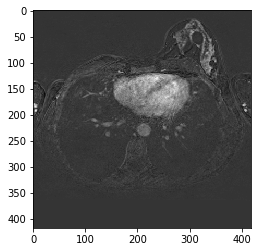

In [2]:
fn = '/mnt/synology/breast/archives/fazael/priors_renamed/02002418/st01/Sub.nrrd'
sitk_img = sitk.ReadImage(fn)
print(sitk_img.GetOrigin())
print(sitk_img.GetSpacing())
img = sitk.GetArrayFromImage(sitk_img)
slc = img[80, 15:-15, 15:-15]
print(img.shape, slc.shape)
plt.imshow(slc, cmap='gray')
plt.show()

In [4]:
def align_image(image, return_trans=False):
    def direction_image(image):
        direction = np.asarray(image.GetDirection()).reshape(3, 3)
        direction[np.abs(direction) < 10e-2 * np.linalg.norm(direction)] = 0
        return direction

    swap_axis = np.where(np.abs(direction_image(image)) > 0.98)[1].tolist()
    image_permute = sitk.PermuteAxesImageFilter()
    image_permute.SetOrder(swap_axis)
    permuted_image = image_permute.Execute(image)
    flip = (direction_image(permuted_image) < 0).sum(axis=0).astype(np.bool).tolist()
    image_flip = sitk.FlipImageFilter()
    image_flip.SetFlipAxes(flip)
    flipped_image = image_flip.Execute(permuted_image)
    if return_trans:
        return flipped_image, image_flip, image_permute
    else:
        return flipped_image

(-170.0, -97.5909652709961, -82.4082260131836)
(0.6640625, 1.30000305175781, 0.6640625)
(256, 120, 512) (120, 512)
(-170.0, -97.5909652709961, -82.4082260131836)
(0.6640625, 1.3000030517578125, 0.6640625)
(256, 120, 512) (120, 512)


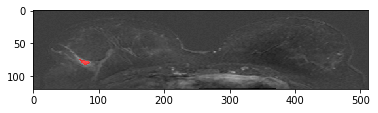

In [33]:
fn = '/mnt/synology/breast/archives/nikita/segmentations/02000798/st07/highresLesion_1_Radiologist_lesionSegmentation.nrrd'
sitk_img_s = sitk.ReadImage(fn)
sitk_img_s = align_image(sitk_img_s)
print(sitk_img_s.GetOrigin())
print(sitk_img_s.GetSpacing())
img_s = sitk.GetArrayFromImage(sitk_img_s)
seg_sum = np.sum(img_s, axis=(1, 2))
midpoint = np.median(np.argwhere(seg_sum > 0))
slc_s = img_s[int(midpoint),...]
print(img_s.shape, slc_s.shape)

#plt.show()


fn = '/mnt/synology/breast/archives/fazael/priors_renamed/02000798/st07/Sub.nrrd'
sitk_img = sitk.ReadImage(fn)
sitk_img = align_image(sitk_img)
print(sitk_img.GetOrigin())
print(sitk_img.GetSpacing())
img = sitk.GetArrayFromImage(sitk_img)
slc = img[int(midpoint),...]
slc_s = np.stack([slc_s, np.zeros_like(slc_s), np.zeros_like(slc_s), slc_s], axis=-1) 
print(img.shape, slc.shape)
plt.figure()
plt.imshow(slc, cmap='gray')
plt.imshow(slc_s, alpha=0.7)
plt.show()


In [130]:
def fn_parser(fn, expr, param):
    m = expr.search(fn)
    if m is None:
        return None
    groups = m.groups()
    t = {}
    for i, key in enumerate(param):
        t[key] = groups[i]
    return t

In [28]:
dset = []
# entry = {'VOL', 'SEG', 'PID', 'SID'}
#


exp = "segmentations/(\w+)/(\w+)/(\w+)[.]nrrd"
cexp = re.compile(exp)
for filename in glob.iglob(seg_dir + '**/*.nrrd', recursive=True):
    print(filename)
    t = fn_parser(filename, cexp, ['PID', 'SID', 'SEG'])
    if t is None:
        print('Not parsed')
        continue
    #print(t)
    entry = {'pid': t['PID'], 'sid': t['SID'], 'segmentation': filename}
    vol_fn = os.path.join(data_dir, t['PID'], t['SID'], 'Sub.nrrd')
    if os.path.exists(vol_fn):
        entry['volume'] = vol_fn
    else:
        print('Not found: ', vol_fn)
        continue
    print(entry)
    dset.append(entry)
    


/mnt/synology/breast/archives/priors/segmentations/02000033/st02/highresLesion_0_Suzan_lesionSegmentation.nrrd
{'pid': '02000033', 'sid': 'st02', 'segmentation': '/mnt/synology/breast/archives/priors/segmentations/02000033/st02/highresLesion_0_Suzan_lesionSegmentation.nrrd', 'volume': '/mnt/synology/breast/archives/fazael/priors_renamed/02000033/st02/Sub.nrrd'}
/mnt/synology/breast/archives/priors/segmentations/02000033/st02/highresLesion_1_Radiologist_lesionSegmentation.nrrd
{'pid': '02000033', 'sid': 'st02', 'segmentation': '/mnt/synology/breast/archives/priors/segmentations/02000033/st02/highresLesion_1_Radiologist_lesionSegmentation.nrrd', 'volume': '/mnt/synology/breast/archives/fazael/priors_renamed/02000033/st02/Sub.nrrd'}
/mnt/synology/breast/archives/priors/segmentations/02000033/st04/highresLesion_0_Suzan_lesionSegmentation.nrrd
{'pid': '02000033', 'sid': 'st04', 'segmentation': '/mnt/synology/breast/archives/priors/segmentations/02000033/st04/highresLesion_0_Suzan_lesionSegm

{'pid': '02000295', 'sid': 'st08', 'segmentation': '/mnt/synology/breast/archives/priors/segmentations/02000295/st08/highresLesion_1_Radiologist_lesionSegmentation.nrrd', 'volume': '/mnt/synology/breast/archives/fazael/priors_renamed/02000295/st08/Sub.nrrd'}
/mnt/synology/breast/archives/priors/segmentations/02000295/st08/highresLesion_1_Suzan_lesionSegmentation.nrrd
{'pid': '02000295', 'sid': 'st08', 'segmentation': '/mnt/synology/breast/archives/priors/segmentations/02000295/st08/highresLesion_1_Suzan_lesionSegmentation.nrrd', 'volume': '/mnt/synology/breast/archives/fazael/priors_renamed/02000295/st08/Sub.nrrd'}
/mnt/synology/breast/archives/priors/segmentations/02000295/st08/highresLesion_567_Albert_lesionSegmentation.nrrd
{'pid': '02000295', 'sid': 'st08', 'segmentation': '/mnt/synology/breast/archives/priors/segmentations/02000295/st08/highresLesion_567_Albert_lesionSegmentation.nrrd', 'volume': '/mnt/synology/breast/archives/fazael/priors_renamed/02000295/st08/Sub.nrrd'}
/mnt/sy

/mnt/synology/breast/archives/priors/segmentations/02000771/st06/highresLesion_0_Albert_lesionSegmentation.nrrd
Not found:  /mnt/synology/breast/archives/fazael/priors_renamed/02000771/st06/Sub.nrrd
/mnt/synology/breast/archives/priors/segmentations/02000771/st07/highresLesion_0_Albert_lesionSegmentation.nrrd
{'pid': '02000771', 'sid': 'st07', 'segmentation': '/mnt/synology/breast/archives/priors/segmentations/02000771/st07/highresLesion_0_Albert_lesionSegmentation.nrrd', 'volume': '/mnt/synology/breast/archives/fazael/priors_renamed/02000771/st07/Sub.nrrd'}
/mnt/synology/breast/archives/priors/segmentations/02000771/st08/highresLesion_1_Radiologist_lesionSegmentation.nrrd
{'pid': '02000771', 'sid': 'st08', 'segmentation': '/mnt/synology/breast/archives/priors/segmentations/02000771/st08/highresLesion_1_Radiologist_lesionSegmentation.nrrd', 'volume': '/mnt/synology/breast/archives/fazael/priors_renamed/02000771/st08/Sub.nrrd'}
/mnt/synology/breast/archives/priors/segmentations/02000772

{'pid': '02000800', 'sid': 'st05', 'segmentation': '/mnt/synology/breast/archives/priors/segmentations/02000800/st05/highresLesion_0_Albert_lesionSegmentation.nrrd', 'volume': '/mnt/synology/breast/archives/fazael/priors_renamed/02000800/st05/Sub.nrrd'}
/mnt/synology/breast/archives/priors/segmentations/02000800/st05/highresLesion_1_Radiologist_lesionSegmentation.nrrd
{'pid': '02000800', 'sid': 'st05', 'segmentation': '/mnt/synology/breast/archives/priors/segmentations/02000800/st05/highresLesion_1_Radiologist_lesionSegmentation.nrrd', 'volume': '/mnt/synology/breast/archives/fazael/priors_renamed/02000800/st05/Sub.nrrd'}
/mnt/synology/breast/archives/priors/segmentations/02000804/st03/highresLesion_1_Radiologist_lesionSegmentation.nrrd
{'pid': '02000804', 'sid': 'st03', 'segmentation': '/mnt/synology/breast/archives/priors/segmentations/02000804/st03/highresLesion_1_Radiologist_lesionSegmentation.nrrd', 'volume': '/mnt/synology/breast/archives/fazael/priors_renamed/02000804/st03/Sub.n

/mnt/synology/breast/archives/priors/segmentations/02000907/st01/highresLesion_1_Radiologist_lesionSegmentation.nrrd
{'pid': '02000907', 'sid': 'st01', 'segmentation': '/mnt/synology/breast/archives/priors/segmentations/02000907/st01/highresLesion_1_Radiologist_lesionSegmentation.nrrd', 'volume': '/mnt/synology/breast/archives/fazael/priors_renamed/02000907/st01/Sub.nrrd'}
/mnt/synology/breast/archives/priors/segmentations/02000907/st01/highresLesion_1_Suzan_lesionSegmentation.nrrd
{'pid': '02000907', 'sid': 'st01', 'segmentation': '/mnt/synology/breast/archives/priors/segmentations/02000907/st01/highresLesion_1_Suzan_lesionSegmentation.nrrd', 'volume': '/mnt/synology/breast/archives/fazael/priors_renamed/02000907/st01/Sub.nrrd'}
/mnt/synology/breast/archives/priors/segmentations/02000907/st08/highresLesion_1_Radiologist_lesionSegmentation.nrrd
{'pid': '02000907', 'sid': 'st08', 'segmentation': '/mnt/synology/breast/archives/priors/segmentations/02000907/st08/highresLesion_1_Radiologis

{'pid': '02000976', 'sid': 'st01', 'segmentation': '/mnt/synology/breast/archives/priors/segmentations/02000976/st01/highresLesion_1_Radiologist_lesionSegmentation.nrrd', 'volume': '/mnt/synology/breast/archives/fazael/priors_renamed/02000976/st01/Sub.nrrd'}
/mnt/synology/breast/archives/priors/segmentations/02000980/st01/Dyna5_0_finalSegmentation.nrrd
{'pid': '02000980', 'sid': 'st01', 'segmentation': '/mnt/synology/breast/archives/priors/segmentations/02000980/st01/Dyna5_0_finalSegmentation.nrrd', 'volume': '/mnt/synology/breast/archives/fazael/priors_renamed/02000980/st01/Sub.nrrd'}
/mnt/synology/breast/archives/priors/segmentations/02000980/st01/highresLesion_0_Radiologist_lesionSegmentation.nrrd
{'pid': '02000980', 'sid': 'st01', 'segmentation': '/mnt/synology/breast/archives/priors/segmentations/02000980/st01/highresLesion_0_Radiologist_lesionSegmentation.nrrd', 'volume': '/mnt/synology/breast/archives/fazael/priors_renamed/02000980/st01/Sub.nrrd'}
/mnt/synology/breast/archives/p

/mnt/synology/breast/archives/priors/segmentations/02001134/st01/highresLesion_0_Radiologist_lesionSegmentation.nrrd
{'pid': '02001134', 'sid': 'st01', 'segmentation': '/mnt/synology/breast/archives/priors/segmentations/02001134/st01/highresLesion_0_Radiologist_lesionSegmentation.nrrd', 'volume': '/mnt/synology/breast/archives/fazael/priors_renamed/02001134/st01/Sub.nrrd'}
/mnt/synology/breast/archives/priors/segmentations/02001134/st02/highresLesion_0_Radiologist_lesionSegmentation.nrrd
{'pid': '02001134', 'sid': 'st02', 'segmentation': '/mnt/synology/breast/archives/priors/segmentations/02001134/st02/highresLesion_0_Radiologist_lesionSegmentation.nrrd', 'volume': '/mnt/synology/breast/archives/fazael/priors_renamed/02001134/st02/Sub.nrrd'}
/mnt/synology/breast/archives/priors/segmentations/02001145/st01/highresLesion_0_Radiologist_lesionSegmentation.nrrd
{'pid': '02001145', 'sid': 'st01', 'segmentation': '/mnt/synology/breast/archives/priors/segmentations/02001145/st01/highresLesion_

/mnt/synology/breast/archives/priors/segmentations/02001312/st06/Dyna6_0_finalSegmentation.nrrd
{'pid': '02001312', 'sid': 'st06', 'segmentation': '/mnt/synology/breast/archives/priors/segmentations/02001312/st06/Dyna6_0_finalSegmentation.nrrd', 'volume': '/mnt/synology/breast/archives/fazael/priors_renamed/02001312/st06/Sub.nrrd'}
/mnt/synology/breast/archives/priors/segmentations/02001312/st06/highresLesion_0_Radiologist_lesionSegmentation.nrrd
{'pid': '02001312', 'sid': 'st06', 'segmentation': '/mnt/synology/breast/archives/priors/segmentations/02001312/st06/highresLesion_0_Radiologist_lesionSegmentation.nrrd', 'volume': '/mnt/synology/breast/archives/fazael/priors_renamed/02001312/st06/Sub.nrrd'}
/mnt/synology/breast/archives/priors/segmentations/02001328/st02/highresLesion_1_Radiologist_lesionSegmentation.nrrd
{'pid': '02001328', 'sid': 'st02', 'segmentation': '/mnt/synology/breast/archives/priors/segmentations/02001328/st02/highresLesion_1_Radiologist_lesionSegmentation.nrrd', 'v

/mnt/synology/breast/archives/priors/segmentations/02001668/st05/highresLesion_1_Radiologist_lesionSegmentation.nrrd
{'pid': '02001668', 'sid': 'st05', 'segmentation': '/mnt/synology/breast/archives/priors/segmentations/02001668/st05/highresLesion_1_Radiologist_lesionSegmentation.nrrd', 'volume': '/mnt/synology/breast/archives/fazael/priors_renamed/02001668/st05/Sub.nrrd'}
/mnt/synology/breast/archives/priors/segmentations/02001726/st03/Dyna5_0_finalSegmentation.nrrd
{'pid': '02001726', 'sid': 'st03', 'segmentation': '/mnt/synology/breast/archives/priors/segmentations/02001726/st03/Dyna5_0_finalSegmentation.nrrd', 'volume': '/mnt/synology/breast/archives/fazael/priors_renamed/02001726/st03/Sub.nrrd'}
/mnt/synology/breast/archives/priors/segmentations/02001726/st04/highresLesion_0_Albert_lesionSegmentation.nrrd
{'pid': '02001726', 'sid': 'st04', 'segmentation': '/mnt/synology/breast/archives/priors/segmentations/02001726/st04/highresLesion_0_Albert_lesionSegmentation.nrrd', 'volume': '/

/mnt/synology/breast/archives/priors/segmentations/02001951/st05/highresLesion_0_Suzan_lesionSegmentation.nrrd
{'pid': '02001951', 'sid': 'st05', 'segmentation': '/mnt/synology/breast/archives/priors/segmentations/02001951/st05/highresLesion_0_Suzan_lesionSegmentation.nrrd', 'volume': '/mnt/synology/breast/archives/fazael/priors_renamed/02001951/st05/Sub.nrrd'}
/mnt/synology/breast/archives/priors/segmentations/02001951/st05/highresLesion_1_Radiologist_lesionSegmentation.nrrd
{'pid': '02001951', 'sid': 'st05', 'segmentation': '/mnt/synology/breast/archives/priors/segmentations/02001951/st05/highresLesion_1_Radiologist_lesionSegmentation.nrrd', 'volume': '/mnt/synology/breast/archives/fazael/priors_renamed/02001951/st05/Sub.nrrd'}
/mnt/synology/breast/archives/priors/segmentations/02001951/st05/highresLesion_1_Suzan_lesionSegmentation.nrrd
{'pid': '02001951', 'sid': 'st05', 'segmentation': '/mnt/synology/breast/archives/priors/segmentations/02001951/st05/highresLesion_1_Suzan_lesionSegm

{'pid': '02002375', 'sid': 'st03', 'segmentation': '/mnt/synology/breast/archives/priors/segmentations/02002375/st03/highresLesion_1_Radiologist_lesionSegmentation.nrrd', 'volume': '/mnt/synology/breast/archives/fazael/priors_renamed/02002375/st03/Sub.nrrd'}
/mnt/synology/breast/archives/priors/segmentations/02002375/st03/highresLesion_2_Radiologist_lesionSegmentation.nrrd
{'pid': '02002375', 'sid': 'st03', 'segmentation': '/mnt/synology/breast/archives/priors/segmentations/02002375/st03/highresLesion_2_Radiologist_lesionSegmentation.nrrd', 'volume': '/mnt/synology/breast/archives/fazael/priors_renamed/02002375/st03/Sub.nrrd'}
/mnt/synology/breast/archives/priors/segmentations/02002381/st01/highresLesion_0_Radiologist_lesionSegmentation.nrrd
{'pid': '02002381', 'sid': 'st01', 'segmentation': '/mnt/synology/breast/archives/priors/segmentations/02002381/st01/highresLesion_0_Radiologist_lesionSegmentation.nrrd', 'volume': '/mnt/synology/breast/archives/fazael/priors_renamed/02002381/st01/

/mnt/synology/breast/archives/priors/segmentations/02002555/st02/highresLesion_2_Radiologist_lesionSegmentation.nrrd
{'pid': '02002555', 'sid': 'st02', 'segmentation': '/mnt/synology/breast/archives/priors/segmentations/02002555/st02/highresLesion_2_Radiologist_lesionSegmentation.nrrd', 'volume': '/mnt/synology/breast/archives/fazael/priors_renamed/02002555/st02/Sub.nrrd'}
/mnt/synology/breast/archives/priors/segmentations/02002555/st02/highresLesion_2_Suzan_lesionSegmentation.nrrd
{'pid': '02002555', 'sid': 'st02', 'segmentation': '/mnt/synology/breast/archives/priors/segmentations/02002555/st02/highresLesion_2_Suzan_lesionSegmentation.nrrd', 'volume': '/mnt/synology/breast/archives/fazael/priors_renamed/02002555/st02/Sub.nrrd'}
/mnt/synology/breast/archives/priors/segmentations/02002556/st01/highresLesion_0_Suzan_lesionSegmentation.nrrd
{'pid': '02002556', 'sid': 'st01', 'segmentation': '/mnt/synology/breast/archives/priors/segmentations/02002556/st01/highresLesion_0_Suzan_lesionSegm

{'pid': '02002573', 'sid': 'st02', 'segmentation': '/mnt/synology/breast/archives/priors/segmentations/02002573/st02/highresLesion_1_Radiologist_lesionSegmentation.nrrd', 'volume': '/mnt/synology/breast/archives/fazael/priors_renamed/02002573/st02/Sub.nrrd'}
/mnt/synology/breast/archives/priors/segmentations/02002573/st02/highresLesion_1_Radiologist_lesionSegmentation_corrected.nrrd
{'pid': '02002573', 'sid': 'st02', 'segmentation': '/mnt/synology/breast/archives/priors/segmentations/02002573/st02/highresLesion_1_Radiologist_lesionSegmentation_corrected.nrrd', 'volume': '/mnt/synology/breast/archives/fazael/priors_renamed/02002573/st02/Sub.nrrd'}
/mnt/synology/breast/archives/priors/segmentations/02002573/st02/highresLesion_1_Suzan_lesionSegmentation.nrrd
{'pid': '02002573', 'sid': 'st02', 'segmentation': '/mnt/synology/breast/archives/priors/segmentations/02002573/st02/highresLesion_1_Suzan_lesionSegmentation.nrrd', 'volume': '/mnt/synology/breast/archives/fazael/priors_renamed/020025

/mnt/synology/breast/archives/priors/segmentations/02004012/st01/highresLesion_1_Radiologist_lesionSegmentation.nrrd
{'pid': '02004012', 'sid': 'st01', 'segmentation': '/mnt/synology/breast/archives/priors/segmentations/02004012/st01/highresLesion_1_Radiologist_lesionSegmentation.nrrd', 'volume': '/mnt/synology/breast/archives/fazael/priors_renamed/02004012/st01/Sub.nrrd'}
/mnt/synology/breast/archives/priors/segmentations/02004012/st01/highresLesion_2_Radiologist_lesionSegmentation.nrrd
{'pid': '02004012', 'sid': 'st01', 'segmentation': '/mnt/synology/breast/archives/priors/segmentations/02004012/st01/highresLesion_2_Radiologist_lesionSegmentation.nrrd', 'volume': '/mnt/synology/breast/archives/fazael/priors_renamed/02004012/st01/Sub.nrrd'}
/mnt/synology/breast/archives/priors/segmentations/02004015/st01/highresLesion_0_Radiologist_lesionSegmentation.nrrd
{'pid': '02004015', 'sid': 'st01', 'segmentation': '/mnt/synology/breast/archives/priors/segmentations/02004015/st01/highresLesion_

In [26]:
len(set([val['pid'] for val in dset]))

109

In [51]:
_SITK_INTERPOLATOR_DICT = {
    'nearest': sitk.sitkNearestNeighbor,
    'linear': sitk.sitkLinear,
    'gaussian': sitk.sitkGaussian,
    'label_gaussian': sitk.sitkLabelGaussian,
    'bspline': sitk.sitkBSpline,
    'hamming_sinc': sitk.sitkHammingWindowedSinc,
    'cosine_windowed_sinc': sitk.sitkCosineWindowedSinc,
    'welch_windowed_sinc': sitk.sitkWelchWindowedSinc,
    'lanczos_windowed_sinc': sitk.sitkLanczosWindowedSinc
}

def resample_sitk_image(sitk_image, spacing=None, interpolator=None,
                        fill_value=0):
    """Resamples an ITK image to a new grid. If no spacing is given,
    the resampling is done isotropically to the smallest value in the current
    spacing. This is usually the in-plane resolution. If not given, the
    interpolation is derived from the input data type. Binary input
    (e.g., masks) are resampled with nearest neighbors, otherwise linear
    interpolation is chosen.
    Parameters
    ----------
    sitk_image : SimpleITK image or str
      Either a SimpleITK image or a path to a SimpleITK readable file.
    spacing : tuple
      Tuple of integers
    interpolator : str
      Either `nearest`, `linear` or None.
    fill_value : int
    Returns
    -------
    SimpleITK image.
    """

    if isinstance(sitk_image, str):
        sitk_image = sitk.ReadImage(sitk_image)
    num_dim = sitk_image.GetDimension()

    if not interpolator:
        interpolator = 'linear'
        pixelid = sitk_image.GetPixelIDValue()

        if pixelid not in [1, 2, 4]:
            raise NotImplementedError(
                'Set `interpolator` manually, '
                'can only infer for 8-bit unsigned or 16, 32-bit signed integers')
        if pixelid == 1:  # 8-bit unsigned int
            interpolator = 'nearest'

    orig_pixelid = sitk_image.GetPixelIDValue()
    orig_origin = sitk_image.GetOrigin()
    orig_direction = sitk_image.GetDirection()
    orig_spacing = np.array(sitk_image.GetSpacing())
    orig_size = np.array(sitk_image.GetSize(), dtype=np.int)

    if not spacing:
        min_spacing = orig_spacing.min()
        new_spacing = [min_spacing] * num_dim
    else:
        new_spacing = [float(s) for s in spacing]

    assert interpolator in _SITK_INTERPOLATOR_DICT.keys(), \
        '`interpolator` should be one of {}'.format(_SITK_INTERPOLATOR_DICT.keys())

    sitk_interpolator = _SITK_INTERPOLATOR_DICT[interpolator]

    new_size = orig_size * (orig_spacing / new_spacing)
    new_size = np.ceil(new_size).astype(np.int)  # Image dimensions are in integers
    new_size = [int(s) for s in new_size]  # SimpleITK expects lists, not ndarrays

    resample_filter = sitk.ResampleImageFilter()

    resampled_sitk_image = resample_filter.Execute(sitk_image,
                                                   new_size,
                                                   sitk.Transform(),
                                                   sitk_interpolator,
                                                   orig_origin,
                                                   new_spacing,
                                                   orig_direction,
                                                   fill_value,
                                                   orig_pixelid)

    return resampled_sitk_image


/mnt/synology/breast/archives/fazael/priors_renamed/02003257/st03/Sub.nrrd /mnt/synology/breast/archives/priors/segmentations/02003257/st03/highresLesion_0_Radiologist_lesionSegmentation.nrrd
Source spacing/size:  (0.9375, 0.9375, 1.0) (384, 192, 160)
Aligned spacing/size:  (0.9375, 1.0, 0.9375) (384, 160, 192)
(-183.59732055664062, -126.00921630859375, -80.35816192626953) (-184.066, -126.509, -79.8894)
(0.71, 0.71, 0.71) (0.71, 0.71, 0.71)
(254, 226, 508) (226, 508) (254, 226, 508) (226, 508, 4)


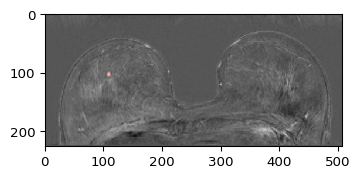

In [133]:
entry = np.random.choice(dset, 1)[0]
tspacing = (0.71, 0.71, 0.71)
vol_fn = entry['volume']
seg_fn = entry['segmentation']
#seg_fn = '/mnt/synology/breast/archives/priors/segmentations/02002789/st02/highresLesion_0_Radiologist_lesionSegmentation.nrrd'
print(vol_fn, seg_fn)

sitk_img_s = sitk.ReadImage(seg_fn)
sitk_img_s = align_image(sitk_img_s)
sitk_img_s = resample_sitk_image(sitk_img_s, spacing=tspacing, interpolator='nearest')
img_s = sitk.GetArrayFromImage(sitk_img_s)
seg_sum = np.sum(img_s, axis=(1, 2))
midpoint = np.median(np.argwhere(seg_sum > 0)) 
slc_s = img_s[int(midpoint),...]
sitk_img = sitk.ReadImage(vol_fn)
print('Source spacing/size: ', sitk_img.GetSpacing(), sitk_img.GetSize())
sitk_img = align_image(sitk_img)
print('Aligned spacing/size: ', sitk_img.GetSpacing(), sitk_img.GetSize())
sitk_img = resample_sitk_image(sitk_img, spacing=tspacing, interpolator='linear')
print(sitk_img.GetOrigin(), sitk_img_s.GetOrigin())
print(sitk_img.GetSpacing(), sitk_img_s.GetSpacing())
img = sitk.GetArrayFromImage(sitk_img)
slc = img[int(midpoint),...]
slc_s = np.stack([slc_s, np.zeros_like(slc_s), np.zeros_like(slc_s), slc_s], axis=-1) 
print(img.shape, slc.shape, img_s.shape, slc_s.shape)
plt.figure(figsize=(slc.shape[0] // 50, slc.shape[1] // 50), dpi=96)
plt.imshow(slc, cmap='gray')
plt.imshow(slc_s, alpha=0.2)
plt.show()

In [128]:
[entry for entry in dset if entry['pid'] == '02002789']

[{'pid': '02002789',
  'segmentation': '/mnt/synology/breast/archives/priors/segmentations/02002789/st02/Dyna5_0_finalSegmentation.nrrd',
  'sid': 'st02',
  'volume': '/mnt/synology/breast/archives/fazael/priors_renamed/02002789/st02/Sub.nrrd'},
 {'pid': '02002789',
  'segmentation': '/mnt/synology/breast/archives/priors/segmentations/02002789/st02/highresLesion_0_Radiologist_lesionSegmentation.nrrd',
  'sid': 'st02',
  'volume': '/mnt/synology/breast/archives/fazael/priors_renamed/02002789/st02/Sub.nrrd'},
 {'pid': '02002789',
  'segmentation': '/mnt/synology/breast/archives/priors/segmentations/02002789/st03/highresLesion_0_Radiologist_lesionSegmentation.nrrd',
  'sid': 'st03',
  'volume': '/mnt/synology/breast/archives/fazael/priors_renamed/02002789/st03/Sub.nrrd'}]

In [9]:
fns = '/mnt/synology/breast/archives/nikita/priors/segmentations/02000948_st17_highresLesion_1_Suzan_lesionSegmentation.nrrd'
seg_vol = sitk.ReadImage(fns)
print(seg_vol.GetDirection())
imgs = sitk.GetArrayFromImage(seg_vol)
print(imgs.shape, np.min(imgs), np.max(imgs), np.median(imgs))
sums = np.sum(imgs, axis=(1, 2))


(1.0, 2.051034e-10, 0.0, -2.051034e-10, 1.0, 0.0, 0.0, 0.0, 1.0)
(248, 508, 508) 0 255 0.0


154
(1.0, 2.051034e-10, 0.0, -2.051034e-10, 1.0, 0.0, 0.0, 0.0, 1.0)


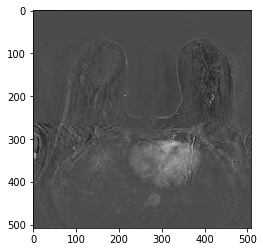

In [10]:
s = int(np.median(np.argwhere(sums > 0)))
print(s)
segs = imgs[s, ...]
segs = np.stack([segs, np.zeros_like(segs), np.zeros_like(segs), segs], axis=-1) 

ifn = '/mnt/synology/breast/archives/nikita/priors/volumes/02000948_st17.nrrd'
img_vol = sitk.ReadImage(ifn)
print(img_vol.GetDirection())
imgv = sitk.GetArrayFromImage(img_vol).astype(np.float32)

vols = imgv[248 - s, ...]

plt.imshow(vols, cmap='gray')
plt.imshow(segs, alpha=0.2)

In [2]:
src_json = '/mnt/synology/breast/archives/nikita/priors/dataset.json'
with open(src_json, 'r') as outfile:
    dset = json.load(outfile)
idx = 0

In [8]:
idx = 176

In [3]:
sel = [ent for ent in dset if '001899_st05' in ent['segmentation']]

In [10]:
entry = sel[0]

/mnt/synology/breast/archives/nikita/priors/volumes/02001899_st05.nrrd /mnt/synology/breast/archives/nikita/priors/segmentations/02001899_st05_highresLesion_1_Suzan_lesionSegmentation.nrrd
Source spacing/size:  (0.71, 0.71, 0.71) (508, 508, 248)
(-180.0, -180.0, -116.41566467285156) (-180.0, -180.0, 58.5843353271484)
(0.71, 0.71, 0.71) (0.71, 0.71, 0.71)
(248, 508, 508) (508, 508) (248, 508, 508) (508, 508, 4)


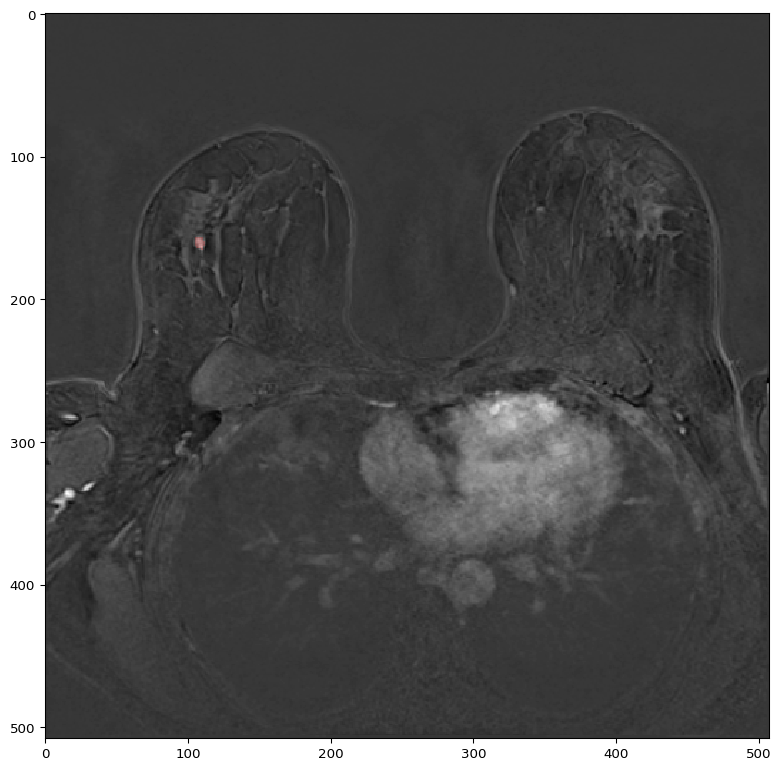

In [15]:
#print(idx)
#entry = dset[idx] #np.random.choice(dset, 1)[0]
tspacing = (0.71, 0.71, 0.71)
vol_fn = entry['volume']
seg_fn = entry['segmentation']
#seg_fn = '/mnt/synology/breast/archives/priors/segmentations/02002789/st02/highresLesion_0_Radiologist_lesionSegmentation.nrrd'
print(vol_fn, seg_fn)

sitk_img_s = sitk.ReadImage(seg_fn)
img_s = sitk.GetArrayFromImage(sitk_img_s) #[::-1, ...]
seg_sum = np.sum(img_s, axis=(1, 2))
midpoint = np.median(np.argwhere(seg_sum > 0))
slc_s = img_s[int(midpoint),...]
sitk_img = sitk.ReadImage(vol_fn)
print('Source spacing/size: ', sitk_img.GetSpacing(), sitk_img.GetSize())
print(sitk_img.GetOrigin(), sitk_img_s.GetOrigin())
print(sitk_img.GetSpacing(), sitk_img_s.GetSpacing())
img = sitk.GetArrayFromImage(sitk_img)
slc = img[int(midpoint),...]
slc_s = np.stack([slc_s, np.zeros_like(slc_s), np.zeros_like(slc_s), slc_s], axis=-1) 
print(img.shape, slc.shape, img_s.shape, slc_s.shape)
plt.figure(figsize=(slc.shape[0] // 50, slc.shape[1] // 50), dpi=96)
plt.imshow(slc, cmap='gray')
plt.imshow(slc_s, alpha=0.2)
plt.show()
idx += 1

In [14]:
fix_seg = sitk.GetImageFromArray(img_s)
fix_seg.SetOrigin(sitk_img_s.GetOrigin())
fix_seg.SetDirection(sitk_img_s.GetDirection())
fix_seg.SetSpacing(sitk_img_s.GetSpacing())
sitk.WriteImage(sitk.Cast(fix_seg, sitk.sitkUInt8), entry['segmentation'])

In [246]:
exp2 = "highresLesion_(\w+)_(\w+)_lesionSegmentation"
cexp2 = re.compile(exp2)
segs = {}
for ent in dset:
    t = fn_parser(ent['segmentation'], cexp2, ['lid', 'auth'])
    key = ent['pid'] + ent['sid']
    if key not in segs:
        segs[key] = []
    segs[key].append((ent['segmentation'], t['auth']))

In [248]:
for key in segs:
    print(key)
    print(segs[key])

02000033st02
[('/mnt/synology/breast/archives/nikita/priors/segmentations/02000033_st02_highresLesion_0_Suzan_lesionSegmentation.nrrd', 'Suzan'), ('/mnt/synology/breast/archives/nikita/priors/segmentations/02000033_st02_highresLesion_1_Radiologist_lesionSegmentation.nrrd', 'Radiologist')]
02000033st04
[('/mnt/synology/breast/archives/nikita/priors/segmentations/02000033_st04_highresLesion_0_Suzan_lesionSegmentation.nrrd', 'Suzan'), ('/mnt/synology/breast/archives/nikita/priors/segmentations/02000033_st04_highresLesion_1_Radiologist_lesionSegmentation.nrrd', 'Radiologist')]
02000081st08
[('/mnt/synology/breast/archives/nikita/priors/segmentations/02000081_st08_highresLesion_0_Albert_lesionSegmentation.nrrd', 'Albert'), ('/mnt/synology/breast/archives/nikita/priors/segmentations/02000081_st08_highresLesion_1_Albert_lesionSegmentation.nrrd', 'Albert'), ('/mnt/synology/breast/archives/nikita/priors/segmentations/02000081_st08_highresLesion_1_Radiologist_lesionSegmentation.nrrd', 'Radiologi

In [236]:
src_json = '/mnt/synology/breast/archives/nikita/priors/dataset.json'
with open(src_json, 'r') as outfile:
    lines = outfile.readlines()

In [242]:
lines[0][54500:55000]

'ves/nikita/priors/volumes/02001951_st04.nrrd", "segmentation": "/mnt/synology/breast/archives/nikita/priors/segmentations/02001951_st04_highresLesion_1_Suzan_lesionSegmentation.nrrd", "size": [508, 508, 248]}, {"pid": "02001951", "sid": "st05", "volume": "/mnt/synology/breast/archives/nikita/priors/volumes/02001951_st05.nrrd", "segmentation": "/mnt/synology/breast/archives/nikita/priors/segmentations/02001951_st05_highresLesion_0_Suzan_lesionSegmentation.nrrd", "size": [508, 508, 248]}, {"pid": '